# Mean field Floquet dynamics
Consider the Hamiltonian of the type
\begin{equation}
\hat{H}(t) = \hat{H}_0 + \left(h \cos{(\omega t)} + h_0\right)\; \hat{H}_1,
\end{equation}

where

\begin{eqnarray}
\hat{H}_0 &=& -\frac{1}{2N}\sum_{ij}\hat{\sigma}^z_i\hat{\sigma}^z_j,\\
\hat{H}_1 &=& \sum_i\hat{\sigma}^x_i.
\end{eqnarray}

Here, we have $N$ spin-$1/2$ particles in a $1-$dimensional lattice, and $i,j$ are site indices. We will now attempt a numerical evaluation of
the Floquet eigenspectrum of this system.

First, define permutation operator $P_{ij} = \displaystyle\frac{1}{2}\left(1+ \vec{\sigma}_i\cdot\vec{\sigma}_j\right)$,
and note that $[P_{ij}, H]=0$. Thus, we can reduce the problem size from the full $2^N\times 2^N$ Hilbert space
to the subspace spanned by the degenerate eigenvectors of $P_{ij}$ corresponding to a single eigenvalue, say $1$.
This is isomorphic to the subspace spanned by degenerate eigenstates of the operator $S^2=|\vec{S}|^2$ with eigenvalue
$\displaystyle\frac{N}{2}\left(\frac{N}{2}+1\right)$, where

\begin{equation}
\vec{S}=S^x\hat{x}+S^y\hat{y}+S^z\hat{z}\equiv \sum_i \vec{\sigma}_i.
\end{equation}

Note that, since $[S^2, S^z]=0$, these are also eigenstates of $S^z$ in this so-called
TSS subspace. The corresponding eigenvalues are $Ns_n$, where $s_n=-\frac{1}{2}+\frac{n}{N}$ and the index
$n= 0 (1) N$ has $N+1$ values. Thus

\begin{equation}
S^z |s_n\rangle = Ns_n|s_n\rangle,
\end{equation}

and the matrix elements $(S^z)_{ij} = Ns_s\delta_{ij}$. Furthermore, defining ladder operators

\begin{equation}
S_\pm \equiv S^x \pm i S^y,
\end{equation}

and using the result

\begin{equation}
S_\pm |s_n\rangle = \sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n\pm 1}\right)}\;\;|s_{n\pm 1}\rangle,
\end{equation}

we can obtain the matrix elements $S^x = S_+ + S_-$ to be

\begin{multline}
(S^x)_{nm} = \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n + 1}\right)}\;\;\delta_{n+1, m}  \\
                        +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n- 1}\right)}\;\;\delta_{n-1,m}\bigg]
\end{multline}

Note that, since the Hamiltonian can be readily written as
$H(t) = -\displaystyle\frac{1}{2N}(S^z)^2 - h_0\cos{(\omega t )}S^x$, the matrix elements of
\begin{eqnarray}
\left(H_0\right)_{ij} &=& -\frac{N}{2} s^2_i \delta_{ij},\nonumber\\
\left(H_1\right)_{ij} &=& \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i + 1}\right)}\;\;\delta_{i+1, j}  \\
    & &                     +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i- 1}\right)}\;\;\delta_{i-1,j}\bigg]
\end{eqnarray}

Note that, in the continuum limit, $N\rightarrow\infty$, we can ignore the difference between adjacent values
of $s_i$. Thus, the Hamiltonian per particle becomes $h(t)\equiv \displaystyle\frac{1}{N}H(t) = h + h_0\cos{(\omega t)}h_1$, where

\begin{eqnarray}
\left(h\right)_{ij} &\approx& -\frac{1}{2} s^2_i \delta_{ij},\nonumber\\
h_0 &\rightarrow& -\frac{1}{2}s^2\\
\left(h_1\right)_{ij} &\approx& \frac{1}{2}\sqrt{\frac{1}{4} - s^2_i}\left[\delta_{i+1, j}  + \delta_{i-1,j}\right]\\
h_1 &\rightarrow& \sqrt{\frac{1}{4} - s^2_i}\;\;\cos{p},
\end{eqnarray}
where we have expanded the matrix elements in a basis of $e^{ipx}$. In this limit, we obtain the Lipkin Model (Insert from previous notebook)
.


References:

[1] Check T. Mori's paper equation (12)

# QuTip code

10.0%. Run time:   0.55s. Est. time left: 00:00:00:04
20.0%. Run time:   1.08s. Est. time left: 00:00:00:04
30.0%. Run time:   1.71s. Est. time left: 00:00:00:03
40.0%. Run time:   2.41s. Est. time left: 00:00:00:03
50.0%. Run time:   3.14s. Est. time left: 00:00:00:03
60.0%. Run time:   3.87s. Est. time left: 00:00:00:02
70.0%. Run time:   4.71s. Est. time left: 00:00:00:02
80.0%. Run time:   5.58s. Est. time left: 00:00:00:01
90.0%. Run time:   6.44s. Est. time left: 00:00:00:00
100.0%. Run time:   7.36s. Est. time left: 00:00:00:00
Total run time:   7.39s
running for N = 30


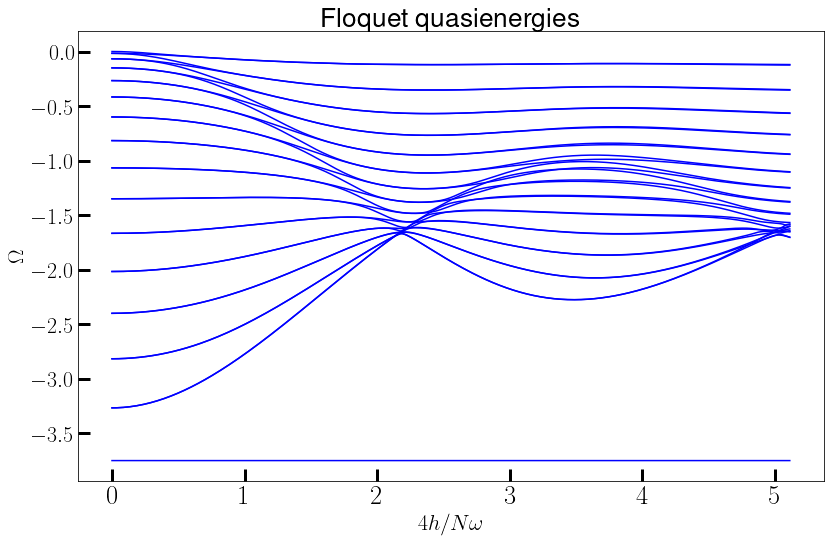

In [95]:
import numpy as np
from qutip import *
from scipy import *
from pylab import *
from array import *
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (10, 10),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 22,
    "font.sans-serif": ["Helvetica"]})

N = 30
dc = 0.0
hsteps = 300
nsteps = 1e6
#tsteps = hsteps +1
s = -0.5 + (1./N) * np.arange(N)
H0 = Qobj(np.diagflat(-0.5 * (N * s)**2)/N)

delta_matrix = np.diagflat(np.ones(N-1),1) + np.diagflat(np.ones(N-1),-1)

H11 = Qobj(0.5 * np.sqrt(0.25*N*N - (N * s)**2) * delta_matrix)

omega = 90.0
args = {'w': omega}
A_vec = np.linspace(0,230, hsteps)

H0 = (H0 + dc * H11)
T = (2*pi)/omega
q_energies = np.zeros((len(A_vec), N))

#print(H0.norm(norm='tr'), ":::", H11.norm(norm='tr'),"\n")

def floquet_exact(A):
    H1 = A * H11
    H = [H0, [H1, lambda t,args: np.cos(args['w'] * t)]]
    try:
        f_modes, f_energies = floquet_modes(H, T, args, Options(method='adams', nsteps=nsteps))
    except Exception:
        f_modes, f_energies = None, np.zeros(N)
    return f_energies

q_energies = parallel_map(floquet_exact, A_vec, progress_bar=True)
q_energies = np.array(q_energies)

print('running for N =',N)    
plt.figure(figsize=(12,8))
for i in np.arange(N):
    plt.plot(2*A_vec/omega, q_energies[:,i],'b')
plt.xlabel(r'$4h/N\omega$')
plt.ylabel(r'$\Omega$')
plt.title(r'Floquet quasienergies')
plt.show()

### floquet code with harmonic oscillator operator formulation

1. A.Roy's code

running for N = 30


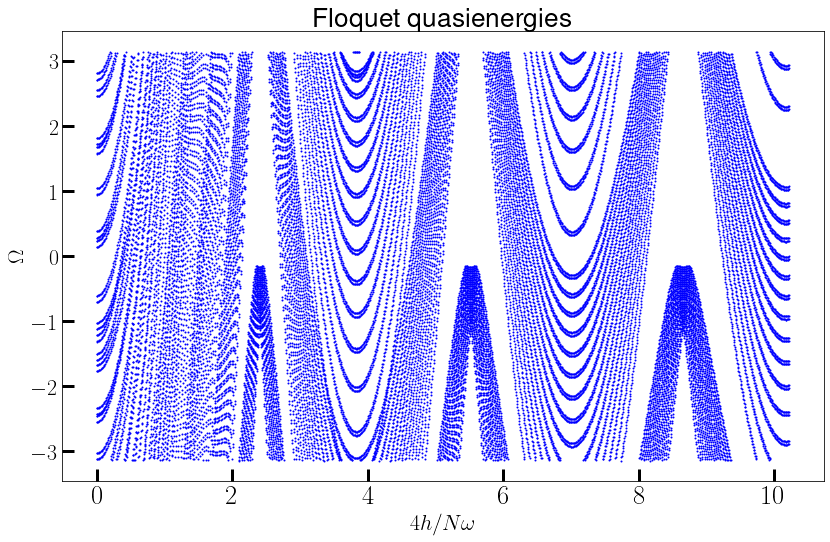

In [107]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 17 22:32:38 2021
Copyright 2021 Analabha Roy (daneel@utexas.edu):
Released under the MIT license @ https://opensource.org/licenses/MIT
"""
from scipy.special import j0
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (10, 10),
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.size": 22,
    "font.sans-serif": ["Helvetica"]})

N = 30
trunc = 600
dc = 0.0
hsteps = 1000
omega = 90.0
args = {'w': omega}
A_vec = np.linspace(0,230, hsteps)

n_arr = np.arange(trunc)
n_arr_2 = np.arange(trunc-2)

q_energies = []

for h in A_vec:
    a = j0(4*h/omega)
    H = np.diagflat(n_arr + 0.5) + a * (np.diagflat(np.sqrt((n_arr_2+1) * (n_arr_2+2)),2) + np.diagflat(np.sqrt(n_arr_2 * (n_arr_2-1)),-2))
    evals = np.linalg.eigvalsh(-H/N)
    q_energies.append(-(1j) * np.log(np.exp(1j * evals)))

q_energies = np.array(q_energies).real

print('running for N =',N)    
plt.figure(figsize=(12,8))
for i in np.arange(N):
    plt.scatter(4*A_vec/omega, q_energies[:,i],c='blue', s=1)
plt.xlabel(r'$4h/N\omega$')
plt.ylabel(r'$\Omega$')
plt.title(r'Floquet quasienergies')
plt.show()